In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install openpyxl

In [3]:
# upload data
df = pd.read_excel('https://github.com/umulsy/Online-Retail/raw/refs/heads/main/Online%20Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# cek duplikasi data
df.duplicated().sum()

5268

In [6]:
# cek duplikat kolom customer ID
df['CustomerID'].duplicated().sum()

537536

Dari sini terlihat, mungkin ada customer yang repeat order

In [7]:
# periksa nilai customer ID
print("Number of unique customers IDs:", len(df['CustomerID'].unique().tolist()))

Number of unique customers IDs: 4373


Terlihat ada 4373 nomor ID tapi terdapat duplikasi sebanyak 537536. Itu berarti mayoritas pelanggan membeli barang lebih dari 1

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


kita lihat lebih dekat alasan nilai negatif dalam variabel-variabel ini. Dalam deskripsi dataset tertulis bahwa ada beberapa transaksi yang dibatalkan yang disajikan dalam dataset. Transaksi yang dibatalkan ditunjukkan dengan nomor faktur yang dimulai dengan huruf 'c'. Mungkin transaksi dengan nilai kuantitas negatif dibatalkan.

In [9]:
# cek InvoiceNo yang berpotensi camcelled dimulai dari huruf C
cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Di antara transaksi yang dibatalkan tidak ada transaksi dengan kuantitas positif

In [10]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [11]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 9288
Total number of transaction with negative quantity: 10624


Ada juga transaksi dengan harga nol. Transaksi dengan harga nol tidak memberikan informasi yang berguna untuk analisis, terlebih lagi tidak ada deskripsi untuk transaksi tersebut. Transaksi ini dapat dihapus

In [12]:
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Ada juga 2 transaksi dengan harga negatif. Dari uraian tersebut, kita dapat melihat bahwa transaksi ini mungkin dilakukan sebagai koreksi, sehingga transaksi tersebut juga harus dihapus.

In [13]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Seperti yang disebutkan sebelumnya ada beberapa transaksi kuantitas negatif yang tidak dibatalkan, tetapi semua transaksi ini memiliki harga 0.

In [14]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]
print("Jumlah transaksi dengan nilai kuantitas negatif di antara transaksi yang tidak dibatalkan : " ,len(d[d['Quantity']<=0]))
print("Jumlah transaksi dengan harga nol dan kuantitas negatif :" ,len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

Jumlah transaksi dengan nilai kuantitas negatif di antara transaksi yang tidak dibatalkan :  1336
Jumlah transaksi dengan harga nol dan kuantitas negatif : 1336


Persentase transaksi yang akan dihapus:

In [15]:
print("Persentase transaksi cancel:" , round(len(cancelled)/len(df)*100, 2),"%")
print("Persentase transaksi dengan nilai nol dan negatif" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Persentase transaksi cancel: 1.71 %
Persentase transaksi dengan nilai nol dan negatif 0.46 %


In [16]:
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

Semua baris dengan deskripsi yang hilang setelah menghapus transaksi yang bermasalah.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


Cek dan hapus duplikasi transaksi

In [18]:
print("Jumlah duplikat transaksi", len(data[data.duplicated()]))

Jumlah duplikat transaksi 5226


In [19]:
data.drop_duplicates(inplace = True)

In [20]:
 data = data.dropna(subset=['CustomerID'])

## Cek Kolom Descriptions

Perlu diperhatikan bahwa deskripsi yang sama dapat ditulis dalam kasus yang berbeda, mari kita ubah semua deskripsi menjadi huruf kecil.

In [21]:
data['Description'] = data['Description'].str.lower()

In [22]:
print("Jumlah kolom unik description:", len(data['Description'].unique().tolist()))

Jumlah kolom unik description: 3877


In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Remove Punctuation : Hapus tanda baca pada kolom deskripsi

In [24]:
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [25]:
print("Jumlah unique value kolom description:", len(data['Description'].unique().tolist()))

Jumlah unique value kolom description: 3867


dapat terlihat lebih sedikit unique value dari sebelumnya

## 2. Cek kolom Stock Code

Kode Stok harus berupa nilai numerik, namun ada beberapa transaksi yang hanya berisi beberapa huruf/kata, transaksi ini juga akan dihapus

In [26]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [27]:
len(data['StockCode'].unique().tolist())

3659

## 3. Cek Kolom Date

Karena tipe data date sudah datetime, jadi tidak perlu diubah lagi. Kita tambahkan kolom hari, bulan, dan tahun untuk dapat mengecek data order per hari, per bulan, dan per tahun

In [28]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [29]:
data['WeekDay'] = data['InvoiceDate'].dt.day_name()

In [30]:
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))

In [31]:
data['hour'] = data['InvoiceDate'].dt.hour

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8


## Membuat kolom baru Total Price untuk melihat penghasilan secara keseluruhan

In [33]:
data['Total_Price'] = data['UnitPrice'] * data['Quantity']

In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,Total_Price
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


## Exploration Data Analysis

### Berapa banyak order per bulan?

In [35]:
plot = pd.DataFrame(data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()

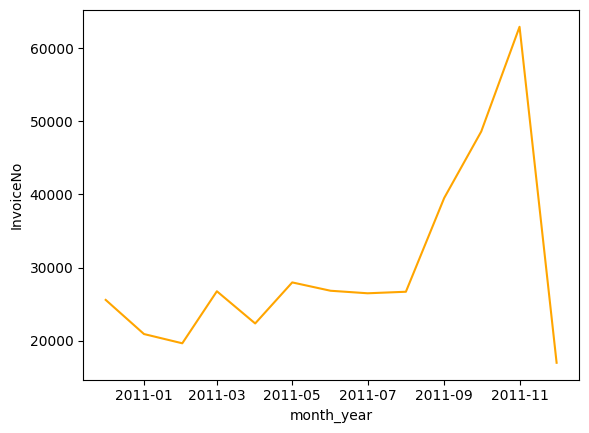

In [36]:
ax = sns.lineplot(x="month_year", y="InvoiceNo", color= 'orange', data = plot)

Insight : Banyak order di akhir tahun. Jumlah transaksi tertinggi dilakukan selama bulan November. Mungkin alasannya adalah fakta bahwa orang cenderung mempersiapkan Natal selama bulan November. Selain bulan November, jumlah pembelian selama tahun ini cukup mirip.

### Berapa banyak order per hari

In [37]:
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())

In [38]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

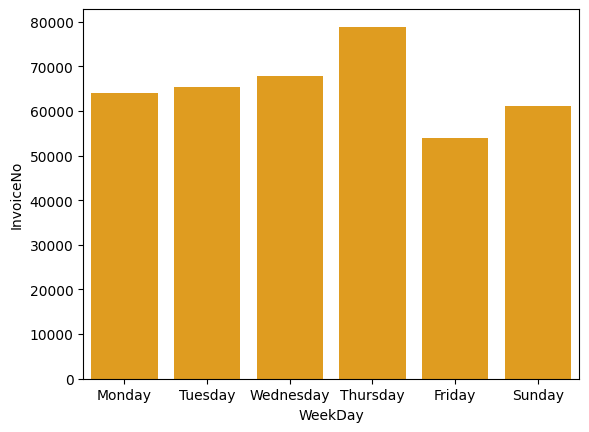

In [39]:
 ax = sns.barplot(x="WeekDay", y="InvoiceNo", color = 'orange', data = plot2)

Insight : Tidak ada transaksi pada hari Sabtu selama periode tersebut. Salah satu penjelasannya bisa jadi karena adanya filter selama proses pengumpulan data. Jumlah pembelian tidak berbeda secara signifikan menurut hari dalam seminggu.

### Berapa banyak order per jam?

In [40]:
plot3 = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()

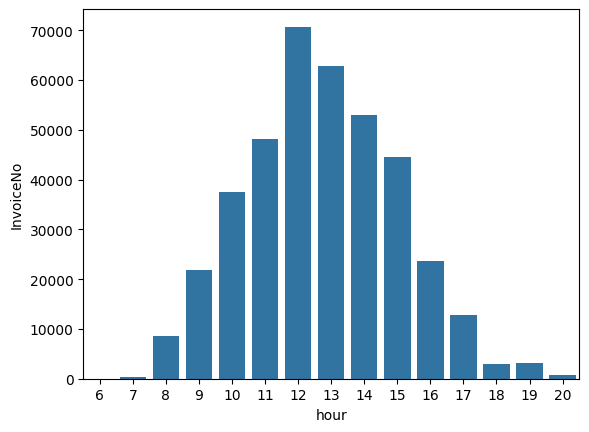

In [41]:
 ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

### Bulan apa yang memiliki total belanja terbanyak?

In [42]:
plot5 = pd.DataFrame(data.groupby(['month_year'])['Total_Price'].sum()).reset_index()

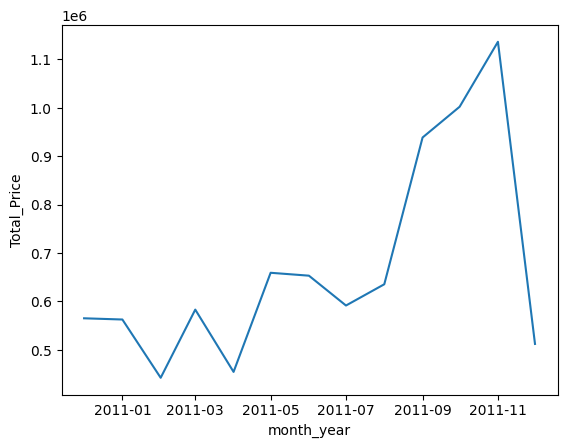

In [43]:
ax = sns.lineplot(x = 'month_year', y='Total_Price', data = plot5)

Tentu, penjualan tertinggi juga terjadi pada bulan November, karena jumlah pembeliannya paling banyak.

### Analisis Harga (UnitPrice)

In [44]:
pd.DataFrame(data['UnitPrice'].describe())

,UnitPrice
count,391150.000000
mean,2.874372
std,4.284738
min,0.040000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


Dari statistik deskriptif untuk variabel harga, kita dapat melihat bahwa sebagian besar produk yang dijual cukup murah. Mungkin menjual secara eceran dan barang-barang kecil.

### Distribusi Barang dengan Harga Mahal

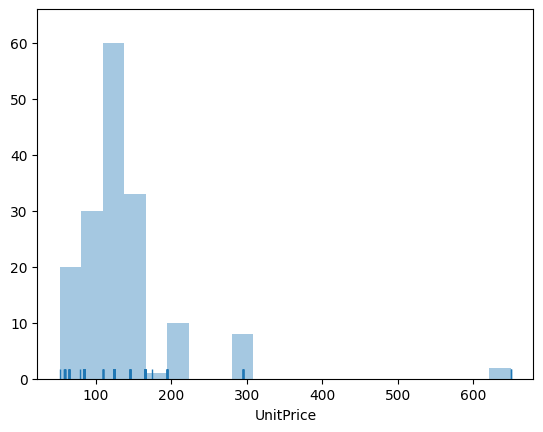

In [45]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

Rentang harga 100-150 memiliki banyak jumlah order yang banyak hingga 60 order

### Cek deskripsi barang dengan harga mahal lebih dari 50

In [46]:
data[data['UnitPrice']>50]['Description'].unique().tolist()

['rustic  seventeen drawer sideboard',
 'vintage post office cabinet',
 'vintage red kitchen cabinet',
 'regency mirror with shutters',
 'love seat antique white metal',
 'vintage blue kitchen cabinet',
 'school desk and chair ',
 'chest natural wood 20 drawers',
 'decorative hanging shelving unit',
 'picnic basket wicker 60 pieces']

Ternyata barang dengan harga lebih dari 50 mayoritas adalah barang furnitur, seperti lemari, cermin hias, kursi, meja dll. (Asumsi: mata uang yang sama untuk penjualan eceran di berbagai negara)

### Analisis Transaksi

In [47]:
customer_country=data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


Negara dengan transaksi terbanyak adalah UK

### Banyak negara yang melakukan transaksi

In [48]:
print("Transaksi dibuat pada", len(data['Country'].unique().tolist()), "negara berbeda")

Transaksi dibuat pada 37 negara berbeda


In [49]:
print("Jumlah transaksi yang negaranya tidak teridentifikasi", len(data[data['Country']=='Unspecified']))

Jumlah transaksi yang negaranya tidak teridentifikasi 241


ada 241 negara yang tidak teridentifikasi

### Grafik Negara dengan pendapatan terbanyak

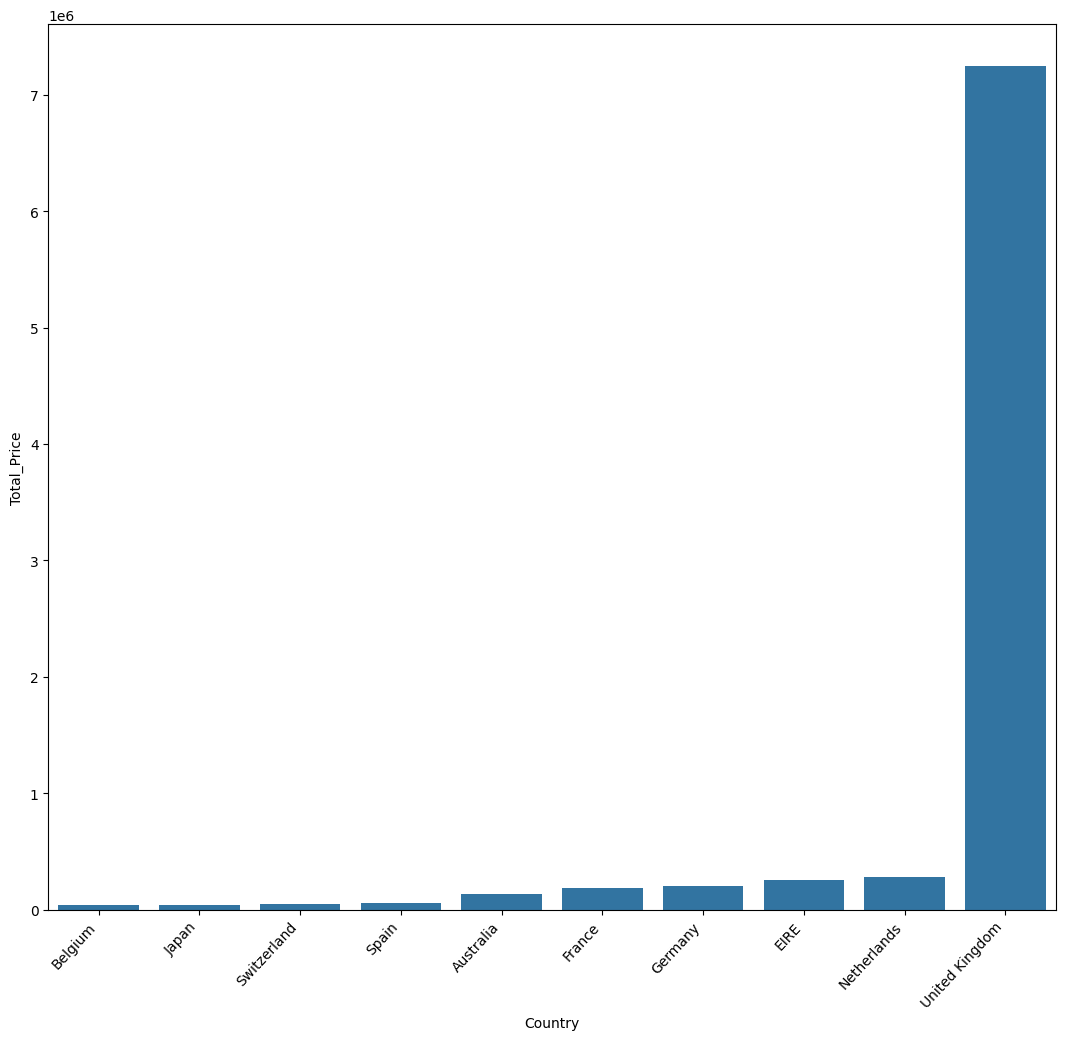

In [50]:
plot6 = pd.DataFrame(data.groupby(['Country'])['Total_Price'].sum()).reset_index()
plot6 = plot6.sort_values(['Total_Price']).reset_index(drop=True)

%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_Price',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

### Negara dengan jumlah pesanan terbanyak

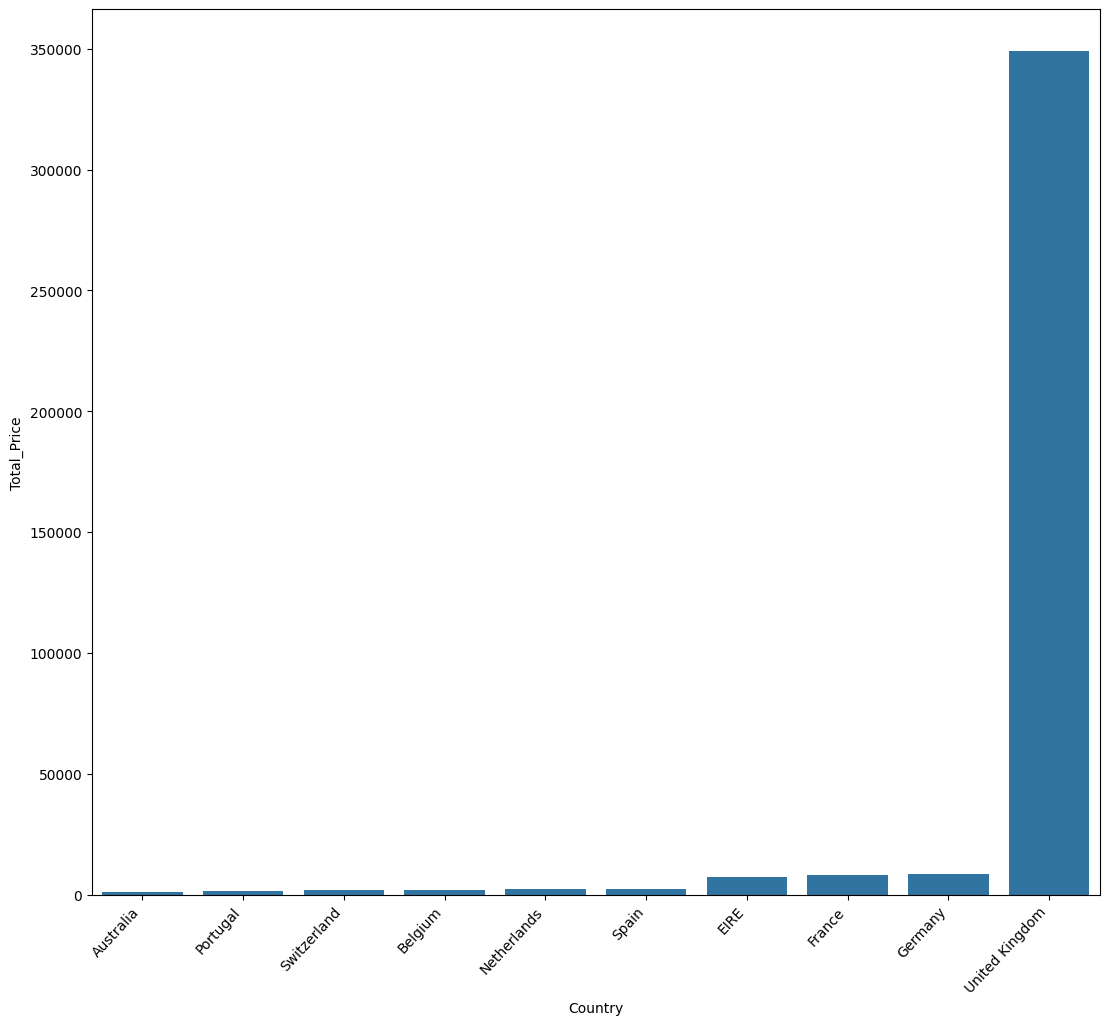

In [51]:
plot7 = pd.DataFrame(data.groupby(['Country'])['Total_Price'].count()).reset_index()
plot7 = plot7.sort_values(['Total_Price']).reset_index(drop=True)

%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_Price',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

Baik jumlah pendapatan maupun jumlah pesanan terdapat pada negara UK karena toko berada di UK

### Analisis Customer

1. Top Customer

In [52]:
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

Hitung top 10 customer

In [53]:
customer  = pd.DataFrame(data.groupby(['CustomerID'])['Total_Price'].sum().sort_values(ascending=False)).reset_index().head(10)

In [54]:
customer['CustomerID'].tolist()

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 12346.0,
 16029.0]

Negara dengan jumlah customer terbanyak

In [55]:
top_customer = data[data['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'Total_Price', 'Quantity', 'freq']]

In [56]:
top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

## Customer Segmentation with RFM Analysis

In [57]:
print(data['InvoiceDate'].min())
print(data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [58]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [59]:
# tanggal terakhir update
import datetime as dt
last_date = dt.datetime(2011,12,10)

rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Price': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_Price': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,18,72,1457.55
12350.0,310,16,294.40


In [60]:
# Membuat fungsi skoring
def rfm_score(col, quantiles):
    if col <= quantiles[0.25]:
        return 4
    elif col <= quantiles[0.50]:
        return 3
    elif col <= quantiles[0.75]:
        return 2
    else:
        return 1

# Hitung kuantil
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# Terapkan skoring
rfm['R_Score'] = rfm['Recency'].apply(rfm_score, args=(quantiles['Recency'],))
rfm['F_Score'] = rfm['Frequency'].apply(rfm_score, args=(quantiles['Frequency'],))
rfm['M_Score'] = rfm['Monetary'].apply(rfm_score, args=(quantiles['Monetary'],))

# Kombinasi RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,4,1,141
12347.0,2,182,4310.00,4,1,1,411
12348.0,75,27,1437.24,2,3,2,232
12349.0,18,72,1457.55,3,2,2,322
12350.0,310,16,294.40,1,4,4,144


In [61]:
rfm['RFM_Score'].unique()

array(['141', '411', '232', '322', '144', '122', '143', '321', '311',
       '442', '211', '233', '422', '133', '444', '222', '333', '443',
       '323', '343', '433', '131', '332', '421', '344', '231', '243',
       '241', '221', '432', '234', '242', '111', '134', '244', '313',
       '431', '121', '212', '434', '132', '213', '142', '423', '441',
       '331', '312', '224', '112', '123', '412', '334', '413', '342',
       '124', '223', '324', '424', '341', '113', '414'], dtype=object)

In [62]:
rfm_segments = rfm.copy()

In [64]:
print("Best Customers: ",len(rfm_segments[rfm_segments['RFM_Score']=='111']), "(", round(len(rfm_segments[rfm_segments['RFM_Score']=='111'])/len(rfm_segments)*100,2), "%)")
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Score']==1]), "(", round(len(rfm_segments[rfm_segments['F_Score']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Score']==1]), "(", round(len(rfm_segments[rfm_segments['M_Score']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFM_Score']=='322']), "(", round(len(rfm_segments[rfm_segments['RFM_Score']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFM_Score']=='444']), "(", round(len(rfm_segments[rfm_segments['RFM_Score']=='444'])/len(rfm_segments)*100,2), "%)")

Best Customers:  21 ( 0.48 %)
Loyal Customers:  1073 ( 24.76 %)
Big Spenders:  1084 ( 25.01 %)
About to Sleep:  171 ( 3.95 %)
Lost Customers:  65 ( 1.5 %)


## Recommendation


Ada masalah dalam pengumpulan data dan proses integrasi data yang harus dipecahkan, untuk analisis data yang lebih efektif dan solusi yang lebih jelas.

1. ID pelanggan hilang - kolom ini dapat dibuat tidak dapat dibatalkan, jika terjadi kejadian ID yang hilang.
2. Kode Stok tidak valid (berisi huruf/beberapa kata yang berbeda) - beberapa kendala pemeriksaan untuk kode stok.
3. Transaksi duplikat - kemungkinan data dikumpulkan dari beberapa sumber, yang menyebabkan beberapa duplikasi.

Setiap kode stok hanya boleh memiliki satu deskripsi produk, aturan ini tidak berlaku dalam kumpulan data. Alasannya bisa jadi karena tidak adanya kendala atau penggabungan tabel yang salah, jika kumpulan data dibatasi dari beberapa tabel.
Pemecahan masalah yang terkait dengan kualitas data dapat meningkatkan hasil algoritma secara signifikan.

Masih sedikit pelanggan setia atau pelanggan yang cenderung menghabiskan banyak uang saat membeli. Ada juga kelompok pelanggan yang sudah hilang dan yang akan hilang dalam waktu dekat. Dengan menggunakan grup ini, beberapa kampanye penargetan dapat digunakan.

1. Best Customers (0.48%)

Karakteristik: Pelanggan yang paling setia dan sering melakukan transaksi dengan nilai pembelian yang besar.
Strategi:

Program VIP Eksklusif: Berikan penawaran eksklusif seperti undangan acara khusus, akses ke produk baru lebih awal, atau layanan personalisasi.
Insentif Loyalitas: Tawarkan reward tambahan untuk pembelian berulang, seperti diskon eksklusif atau poin loyalty tinggi.
Umpan Balik Pelanggan: Libatkan mereka dalam survei produk atau layanan untuk memastikan kepuasan mereka terus terjaga.
Dampak: Meningkatkan retensi pelanggan dan potensi word-of-mouth marketing yang positif.
2. Loyal Customers (24.76%)

Karakteristik: Pelanggan setia yang sering membeli, meski mungkin dengan jumlah pembelanjaan moderat.
Strategi:

Program Reward: Berikan insentif berupa diskon, voucher, atau poin tambahan untuk setiap pembelian yang dilakukan.
Kampanye Referral: Dorong pelanggan ini untuk mengajak teman atau keluarga dengan memberikan diskon kepada kedua belah pihak.

Promosi Produk Baru: Berikan promosi eksklusif untuk produk atau layanan baru yang dapat mendorong pembelian tambahan.

Dampak: Mempertahankan hubungan dengan pelanggan setia dan memperluas basis pelanggan melalui rekomendasi.

3. Big Spenders (25.01%)

Karakteristik: Pelanggan yang mengeluarkan banyak uang untuk setiap transaksi tetapi mungkin tidak sering membeli.
Strategi:

Promosi Produk Premium: Tawarkan produk atau layanan bernilai tinggi yang sesuai dengan preferensi mereka.
Paket Bundling: Buat paket bundling produk dengan diskon kecil untuk mendorong pembelian lebih besar.
Pengalaman Belanja Eksklusif: Sediakan layanan personalisasi atau pengalaman belanja premium, seperti konsultasi khusus atau pengiriman prioritas.
Dampak: Meningkatkan pendapatan dari pelanggan dengan daya beli tinggi.

4. About to Sleep (3.95%)

Karakteristik: Pelanggan yang jarang bertransaksi dan berisiko menjadi tidak aktif.
Strategi:

Kampanye Re-engagement: Kirim email atau pesan penawaran menarik seperti diskon besar atau produk gratis jika mereka melakukan pembelian berikutnya.

Umpan Balik: Kirimkan survei singkat untuk memahami alasan mereka kurang aktif, dan gunakan umpan balik ini untuk meningkatkan layanan.

Promosi Terbatas: Ciptakan urgensi dengan menawarkan promosi jangka pendek untuk mendorong pembelian.

Dampak: Meningkatkan keterlibatan dan mencegah churn.
5. Lost Customers (1.5%)

Karakteristik: Pelanggan yang sudah tidak aktif dalam jangka waktu lama.
Strategi:

Kampanye Reklamasi: Kirimkan penawaran khusus seperti diskon besar atau paket gratis untuk menarik mereka kembali.

Survei Kepuasan: Tanyakan alasan mereka berhenti membeli untuk memahami kelemahan layanan dan memperbaikinya.

Pesan Emosional: Gunakan pesan emosional seperti nostalgia untuk menarik perhatian mereka.

Dampak: Mengembalikan sebagian pelanggan yang hilang dan meningkatkan reputasi bisnis dengan layanan yang lebih baik.